In [1]:
import os
import sys
print(sys.executable)

C:\ProgramData\Anaconda3\python.exe


In [2]:
#!pip install wordcloud

In [3]:
import numpy as np
 
import matplotlib.pyplot as plt
% matplotlib inline

import PIL as pillow
#import worldcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import pandas as pd


In [4]:

import nltk
from nltk.tokenize import word_tokenize # as wt
from nltk.tokenize import sent_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#this is sample data
from nltk.corpus import names  

from string import punctuation

#if the next cell does not work
#remove number symbol on following lines and re-run this cell
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('names')
nltk.download('stopwords')
nltk.download('vader_lexicon')



C:\ProgramData\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\GBTC406015ur\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\GBTC406015ur\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package names to
[nltk_data]     C:\Users\GBTC406015ur\AppData\Roaming\nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\GBTC406015ur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\GBTC406015ur\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [8]:
os.getcwd()

'C:\\Users\\GBTC406015ur\\Documents'

In [13]:
df = pd.read_csv('.\datasets\suicidal thoughts.csv')
df_play = df

In [14]:
df.head()

,content
0,depression symptoms \n\n• loss of interest in...
1,"Depression changes people, \nit makes them tru..."
2,Mental health check in : \n\n: I’m amazing \n:...
3,"Often the narrative on suicide is ""but how wou..."
4,#FF @OpStopSuicide \n\nIf you suffer from:\n\n...


In [11]:
df.count()

content    1779
dtype: int64

In [75]:
'''#dataframe that does not (~) h

df_play = df[~df.content.str.contains('Sri')]
df_play = df_play[~df.content.str.contains('Lan*')]
df_play = df_play[~df.content.str.contains('bombers')]
df_play = df_play[~df.content.str.contains('killed')]
df_play = df_play[~df.content.str.contains('bombing')]
df_play = df_play[~df.content.str.contains('attacks')]
df_play = df_play[~df.content.str.contains('easter')]
df_play = df_play[~df.content.str.contains('Sunday')]
df_play = df_play[~df.content.str.contains('lan*')]
'''

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages

In [60]:
df_play.count()

content    1473
dtype: int64

In [18]:
#df.dropna()

In [19]:
df_content = df[['content']]

In [20]:
df_content.head()

,content
0,depression symptoms \n\n• loss of interest in...
1,"Depression changes people, \nit makes them tru..."
2,Mental health check in : \n\n: I’m amazing \n:...
3,"Often the narrative on suicide is ""but how wou..."
4,#FF @OpStopSuicide \n\nIf you suffer from:\n\n...


In [21]:
string = []

#for item in content['].items():
#    string.append[item]

my_string = ' '.join(df_content['content'].tolist())

In [22]:
wctext = my_string.lower()

In [23]:
tknz_wct = word_tokenize(wctext)

In [24]:
len(tknz_wct)

73722

In [25]:
tknz_wct[:10]

['depression',
 'symptoms',
 '•',
 'loss',
 'of',
 'interest',
 'in',
 'things',
 'you',
 'liked']

In [26]:
fd_wct = FreqDist(tknz_wct)
fd_wct

FreqDist({'depression': 543,
          'symptoms': 22,
          '•': 180,
          'loss': 39,
          'of': 1009,
          'interest': 13,
          'in': 686,
          'things': 71,
          'you': 1332,
          'liked': 9,
          '.': 3091,
          'feelings': 60,
          'guilt': 37,
          'and': 1449,
          'worthlessness': 8,
          'overeating': 7,
          'or': 411,
          'appetite': 11,
          'trouble': 10,
          'concentrating': 6,
          'persistent': 9,
          'sad': 38,
          '“': 141,
          'empty': 10,
          '”': 138,
          'suicidal': 1821,
          'thoughts': 1822,
          'will': 144,
          'rt': 40,
          'for': 574,
          '#': 618,
          'mentalhealthawarenessmonth': 3,
          '?': 215,
          'changes': 12,
          'people': 337,
          ',': 2428,
          'it': 750,
          'makes': 27,
          'them': 168,
          'trust': 10,
          'less': 22,
          'over

In [27]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [28]:
#remove the punctuation
for word in tknz_wct:
    if word in punctuation:
        tknz_wct.remove(word)

In [29]:
len(tknz_wct)

65722

In [31]:
eng_stopwords = stopwords.words('english')
eng_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [32]:
rm_count = 0
new_words = []

for word in tknz_wct:
    if word not in eng_stopwords:# or "'s" or '``' or "''":
        new_words.append(word)
    else:
        rm_count += 1

In [33]:
len(new_words)

37362

In [34]:
rm_count

28360

In [35]:
fd_nw = FreqDist(new_words)
fd_nw.most_common(200)

[('thoughts', 1822),
 ('suicidal', 1821),
 ('’', 1069),
 ('depression', 543),
 ('people', 337),
 ('suicide', 318),
 ('mental', 264),
 ('help', 245),
 ('someone', 233),
 ('life', 228),
 ('please', 220),
 ('know', 217),
 ("'s", 212),
 ('anxiety', 210),
 ('#', 188),
 ('•', 180),
 ('health', 179),
 ('get', 153),
 ("n't", 152),
 ('like', 151),
 ('one', 144),
 ('“', 141),
 ("''", 139),
 ('talk', 139),
 ('”', 138),
 ('feel', 126),
 ('men', 125),
 ('need', 122),
 ('``', 119),
 ('struggling', 113),
 ('https', 113),
 ("'m", 108),
 ('still', 108),
 ('anyone', 108),
 ('...', 106),
 ('going', 102),
 ('never', 101),
 ('call', 100),
 ('today', 99),
 ('love', 98),
 ('time', 96),
 ('alone', 92),
 ('want', 92),
 ('support', 91),
 ('http', 89),
 ('year', 89),
 ('illness', 84),
 ("'re", 84),
 ('make', 83),
 ('feeling', 82),
 ('good', 80),
 ('may', 80),
 ('self', 79),
 ('many', 78),
 ('even', 77),
 ('day', 76),
 ('really', 75),
 ('…', 75),
 ('much', 74),
 ('ever', 74),
 ('suffer', 73),
 ('us', 72),
 ('thin

In [42]:
rm_count = 0
final_words = []

for ugly_word in new_words:
    if ugly_word in ["'s","''",'``','@', '',"n't", '“','•','â€™','’' ,'#','”', '.','(',"'m", 'itâ€™s', '!', 'itâ€™s']:
        ugly_word = ' '
        final_words.append(ugly_word)
    #elseif ugly_word == 
    else:
        final_words.append(ugly_word)
        rm_count += 1

In [43]:
fd_nwFinal = FreqDist(final_words)
fd_nwFinal.most_common(100)

[(' ', 2605),
 ('thoughts', 1822),
 ('suicidal', 1821),
 ('depression', 543),
 ('people', 337),
 ('suicide', 318),
 ('mental', 264),
 ('help', 245),
 ('someone', 233),
 ('life', 228),
 ('please', 220),
 ('know', 217),
 ('anxiety', 210),
 ('health', 179),
 ('get', 153),
 ('like', 151),
 ('one', 144),
 ('talk', 139),
 ('feel', 126),
 ('men', 125),
 ('need', 122),
 ('struggling', 113),
 ('https', 113),
 ('still', 108),
 ('anyone', 108),
 ('...', 106),
 ('going', 102),
 ('never', 101),
 ('call', 100),
 ('today', 99),
 ('love', 98),
 ('time', 96),
 ('alone', 92),
 ('want', 92),
 ('support', 91),
 ('http', 89),
 ('year', 89),
 ('illness', 84),
 ("'re", 84),
 ('make', 83),
 ('feeling', 82),
 ('good', 80),
 ('may', 80),
 ('self', 79),
 ('many', 78),
 ('even', 77),
 ('day', 76),
 ('really', 75),
 ('…', 75),
 ('much', 74),
 ('ever', 74),
 ('suffer', 73),
 ('us', 72),
 ('things', 71),
 ('god', 70),
 ('take', 69),
 ('always', 68),
 ('u', 68),
 ('would', 67),
 ('better', 66),
 ('years', 66),
 ('eve

In [44]:
len(fd_nwFinal)

6946

In [45]:
fd_nwFinal

FreqDist({'depression': 543,
          'symptoms': 22,
          ' ': 2605,
          'loss': 39,
          'interest': 13,
          'things': 71,
          'liked': 9,
          'feelings': 60,
          'guilt': 37,
          'worthlessness': 8,
          'overeating': 7,
          'appetite': 11,
          'trouble': 10,
          'concentrating': 6,
          'persistent': 9,
          'sad': 38,
          'empty': 10,
          'suicidal': 1821,
          'thoughts': 1822,
          'rt': 40,
          'mentalhealthawarenessmonth': 3,
          'changes': 12,
          'people': 337,
          'makes': 27,
          'trust': 10,
          'less': 22,
          'overthink': 1,
          'think': 48,
          'mental': 264,
          'health': 179,
          'check': 28,
          'amazing': 19,
          'pretty': 19,
          'good': 80,
          'okay': 36,
          'coming': 15,
          'back': 47,
          'tough': 13,
          'awful': 7,
          'completely': 9,
  

In [46]:
type(fd_nwFinal)

nltk.probability.FreqDist

In [47]:
type(final_words)

list

In [48]:
#creating a string/text file with join statement
finalList = ' '.join(final_words)

In [49]:
finalList

"depression symptoms   loss interest things liked   feelings guilt worthlessness   overeating appetite loss   trouble concentrating   persistent sad   empty   feelings   suicidal thoughts rt mentalhealthawarenessmonth depression changes people makes trust less overthink think suicidal thoughts mental health check   amazing pretty good good   okay   coming back   tough   awful   completely lost   suicidal thoughts often narrative suicide   would make me/them feel died   correct   wrong   asking person suicidal thoughts feel help suicide loss hurts 've lived guilt trips   help ff opstopsuicide suffer   depression   anxiety   eating disorder   self-harm   ocd   bipolar   feelings guilt hopelessness   suicidal thoughts alone opstopsuicide actually   suicidal suicidal thoughts   suicidal thoughts rn   know benzobrist18 recognize christian wondering could pray   struggling suicidal thoughts cutting   trying stronger relationship god advice would b im eating since last night im suicidal thoug

In [50]:
sid = SentimentIntensityAnalyzer()

In [51]:
sid.polarity_scores(finalList)

{'compound': -1.0, 'neg': 0.348, 'neu': 0.492, 'pos': 0.161}

In [52]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [53]:
#I have to create an instance
wordcloud = WordCloud()
wc = wordcloud.generate(finalList)

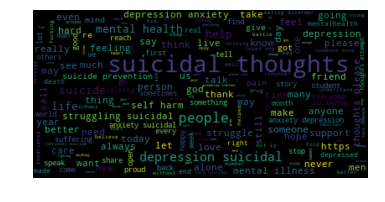

In [55]:
# Display the generated imaged
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

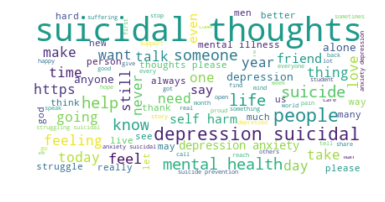

In [56]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(finalList)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()